In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importação dos dados
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# descrição dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# range da idade das casas
print('Oldest House:', df['YearBuilt'].min())
print('Newest House:', df['YearBuilt'].max())

Oldest House: 1872
Newest House: 2010


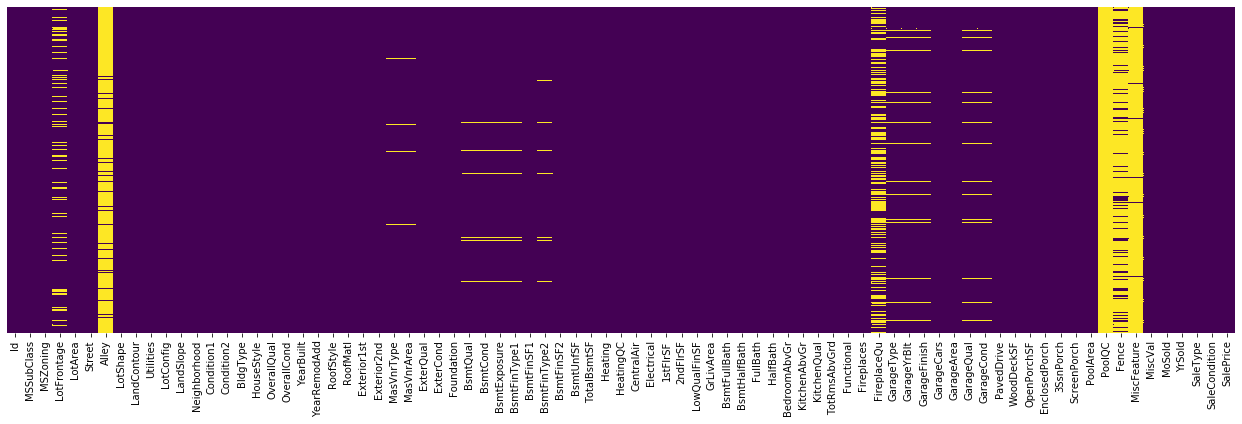

In [5]:
# visualização de valores ausentes
fig, ax = plt.subplots(figsize=(22,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [6]:
# colunas com maior número de valores faltando
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [7]:
# removendo colunas com muitos valores faltando
# Alley também foi removido, não por ausência de valores, mas por grande parte das casas não terem
df.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','Fence'], axis=1,inplace=True)

In [8]:
df.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageFinish      81
GarageType        81
GarageCond        81
GarageQual        81
                ... 
CentralAir         0
HeatingQC          0
Heating            0
SaleCondition      0
Id                 0
Length: 76, dtype: int64

In [9]:
# removendo mais colunas com valores NA
df.drop(['LotFrontage', 'GarageFinish', 'GarageType', 'GarageCond', 'GarageQual'], axis=1,inplace=True)

In [10]:
df.isna().sum().sort_values(ascending=False)

GarageYrBlt     81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
                ..
CentralAir       0
HeatingQC        0
Heating          0
TotalBsmtSF      0
Id               0
Length: 71, dtype: int64

In [11]:
# removendo mais colunas
df.drop(['GarageYrBlt','BsmtFinType1','BsmtFinType2','BsmtExposure'], axis=1,inplace=True)

In [12]:
df.isna().sum().sort_values(ascending=False)

BsmtCond      37
BsmtQual      37
MasVnrArea     8
MasVnrType     8
Electrical     1
              ..
2ndFlrSF       0
1stFlrSF       0
CentralAir     0
HeatingQC      0
Id             0
Length: 67, dtype: int64

In [13]:
# removendo mais colunas
# removida a coluna electrical também
df.drop(['BsmtCond','BsmtQual','Electrical'], axis=1,inplace=True)

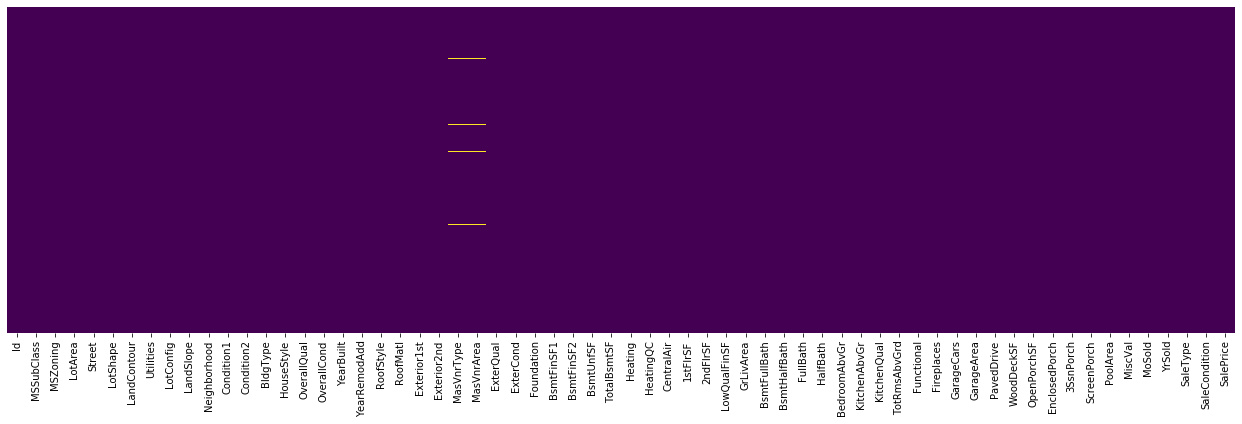

In [14]:
# visualização de valores ausentes
fig, ax = plt.subplots(figsize=(22,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

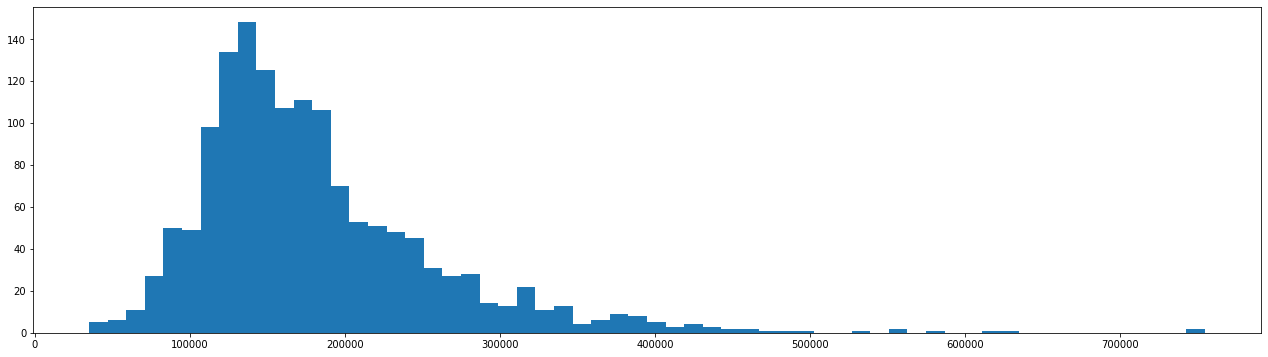

In [15]:
# distribuição dos preços
fig, ax = plt.subplots(figsize=(22,6))
plt.hist(df['SalePrice'],bins=60);

In [16]:
df['SalePrice'].skew()

1.8828757597682129

In [17]:
# "Normalizando"
logprice = np.log(df['SalePrice'])
logprice.skew()

0.12133506220520406

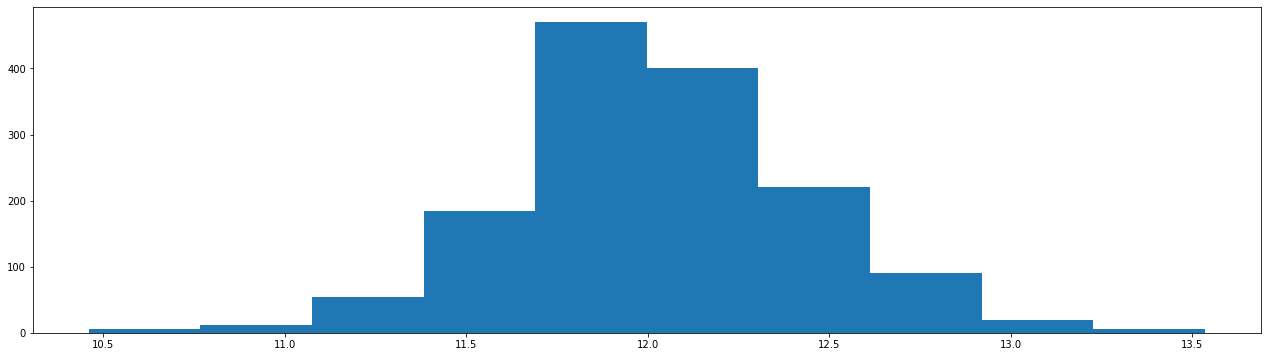

In [18]:
fig, ax = plt.subplots(figsize=(22,6))
plt.hist(logprice);

In [19]:
# novo dataframe com as colunas numéricas
numcol = df.select_dtypes(include=[np.number])
print(numcol.dtypes)

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [20]:
# análise primária de correlação das colunas numéricas
corr = numcol.corr()

In [21]:
# As primeiras 5 colunas com maior correlação com o preço e as últimas, com menor correlação
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


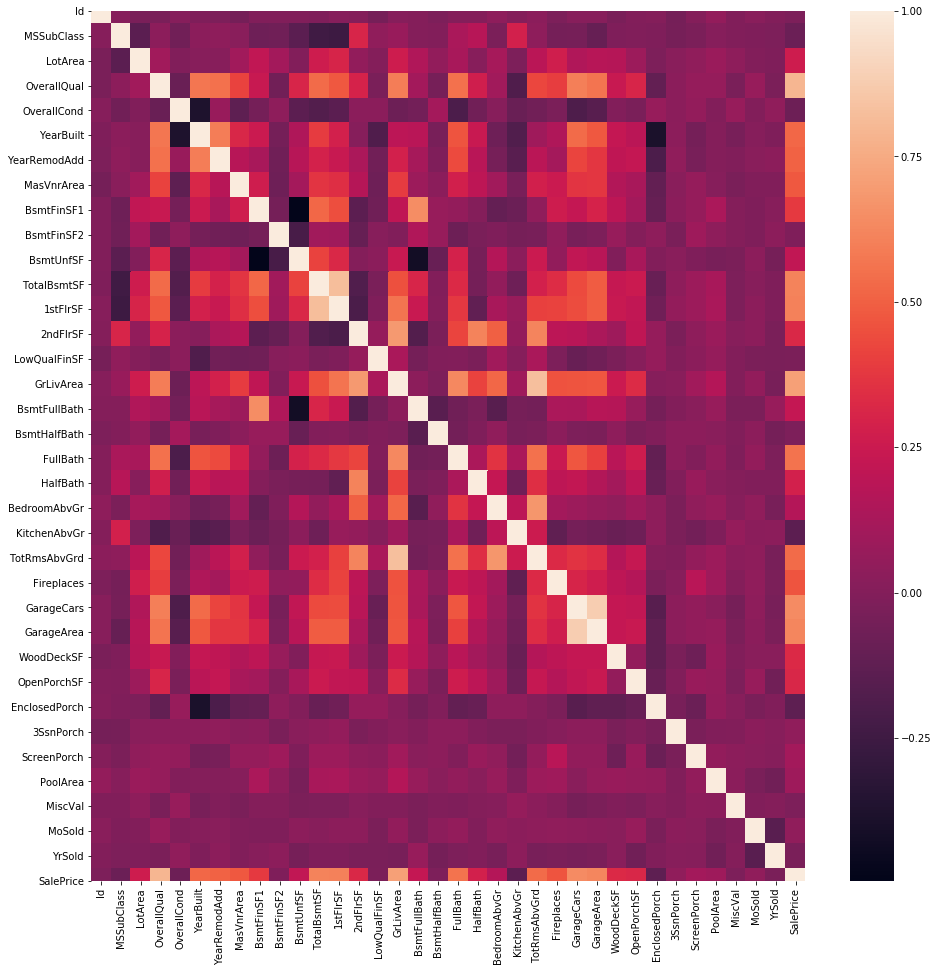

In [22]:
plt.figure(figsize=(16,16))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);

In [23]:
# Mais uma verificação de valores nulos
numcol.isna().sum().sort_values(ascending=False)

MasVnrArea       8
SalePrice        0
BsmtFinSF2       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF1       0
YrSold           0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
MSSubClass       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
OpenPorchSF      0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
WoodDeckSF       0
HalfBath         0
GarageArea       0
GarageCars       0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
Id               0
dtype: int64

In [24]:
# removendo a variável explicada e o Id
numcol.drop(['SalePrice','Id'],axis=1,inplace=True)

C:\Users\gctia\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
# substituindo valores faltando por 0
numcol.fillna(0,inplace=True)

C:\Users\gctia\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [26]:
numcol.isna().sum().sort_values(ascending=False)

YrSold           0
BsmtFinSF2       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF1       0
MoSold           0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MSSubClass       0
dtype: int64

In [27]:
# regressão linear
from sklearn.model_selection import train_test_split

In [28]:
x = numcol
y = df['SalePrice']

In [29]:
# Divisão Treino-Teste
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
# Fit
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lm.coef_

array([-1.28430935e+02,  5.57645524e-01,  1.53434108e+04,  4.88822729e+03,
        3.52329457e+02,  2.21644989e+02,  2.73813058e+01,  2.11146688e+01,
        2.93104855e+00, -2.45189849e+00,  2.15938189e+01,  2.63151616e+01,
        2.91842028e+01, -2.88268593e+01,  2.66725050e+01, -6.53413545e+02,
       -1.25251802e+04, -2.07475817e+03, -2.21488270e+03, -1.18152104e+04,
       -1.58398297e+04,  5.79065767e+03,  1.65217577e+03,  6.14381598e+03,
        1.14114097e+01,  1.09315785e+01,  9.00092985e+00, -8.40166458e-01,
        8.05177103e+00,  1.79200163e+01,  7.16464870e+01, -1.45541755e+00,
        1.19438866e+02, -3.87310812e+02])

In [34]:
predictions = lm.predict(x_test)

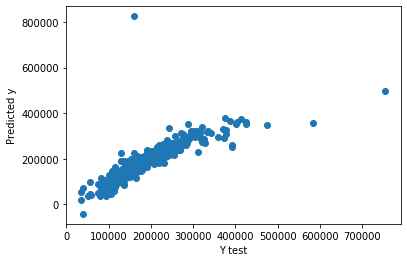

In [35]:
# Scatter Plot
plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted y');

In [36]:
# R^2 do teste
lm.score(x_test,y_test)

0.6817671570708622

In [37]:
# R^2 do treino
lm.score(x_train,y_train)

0.8462535179824657

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 22287.818815701146
MSE: 2002586046.4161499
RMSE: 44750.26308767525


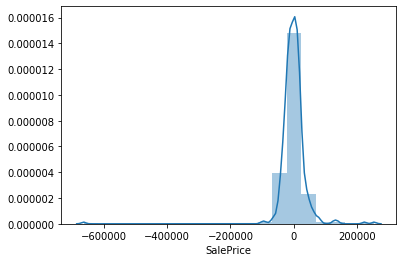

In [39]:
sns.distplot(y_test-predictions, bins=20);

In [40]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'],ascending=False).head()

,Coefficient
OverallQual,15343.410761
GarageCars,6143.815978
TotRmsAbvGrd,5790.657672
OverallCond,4888.227290
Fireplaces,1652.175769


In [41]:
coeff_df.sort_values(by=['Coefficient']).head()

,Coefficient
KitchenAbvGr,-15839.829672
BsmtHalfBath,-12525.180246
BedroomAbvGr,-11815.210424
HalfBath,-2214.882703
FullBath,-2074.758167


In [42]:
# novo dataframe com as colunas numéricas
catcol = df.select_dtypes(include=[np.object])
print(catcol.dtypes)

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
Heating          object
HeatingQC        object
CentralAir       object
KitchenQual      object
Functional       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object


In [43]:
catcold = pd.get_dummies(catcol,drop_first=True) 

In [44]:
catcold.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
# Visualização de PCA
from sklearn.preprocessing import StandardScaler
catcold_std = StandardScaler().fit_transform(catcold)

In [46]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(catcold_std)

In [47]:
Y_sklearn

array([[ 3.65040693, -0.1284798 ],
       [-2.28516947, -0.74947053],
       [ 3.79892838, -0.40245349],
       ...,
       [ 0.20610805,  2.25233444],
       [-1.34200457, -0.78988739],
       [-1.02216729, -1.45084405]])

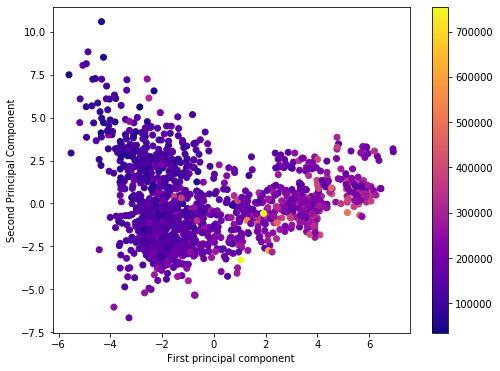

In [80]:
# Scatter plot do PCA
plt.figure(figsize=(8,6))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1],
           # color
           c=df['SalePrice'],
           # colormap
           cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar();

In [49]:
# Regressão Logística

In [50]:
# Juntando os dataframes, numérico e categórico (agora com dummies)
newdf = pd.concat([numcol,catcold],axis=1)

In [51]:
newdf.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [71]:
# Separando os preços por faixas
faixas = pd.cut(df['SalePrice'],3,labels=['1st','2nd','3rd'])
faixas

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1455    1st
1456    1st
1457    1st
1458    1st
1459    1st
Name: SalePrice, Length: 1460, dtype: category
Categories (3, object): [1st < 2nd < 3rd]

In [72]:
# Divisão Treino-Teste
X_train,X_test,Y_train,Y_test = train_test_split(newdf,faixas,test_size=0.30,random_state=101)

In [73]:
# Treino
from sklearn.linear_model import LogisticRegression

In [74]:
# Regressão logística multinomial, pois é um problema de multiclasse
logmodel = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logmodel.fit(X_train,Y_train)

C:\Users\gctia\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
predictions = logmodel.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
# Resultado
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         1st       0.98      0.98      0.98       393
         2nd       0.80      0.74      0.77        43
         3rd       0.25      0.50      0.33         2

    accuracy                           0.95       438
   macro avg       0.68      0.74      0.69       438
weighted avg       0.96      0.95      0.96       438



In [ ]:
# Lendo a descrição das colunas, descobri que tem casas listadas com amianto (asbestos)
df.loc[(df['Exterior1st']=='AsbShng')|(df['Exterior2nd']=='AsbShng')]

In [ ]:
df['Exterior1st'].value_counts()

In [ ]:
df['Exterior2nd'].value_counts()

In [ ]:
# Dummies para para exterior
exterior = pd.get_dummies(df['Exterior1st'],drop_first=True) 

In [ ]:
exterior.head()